In [1]:
import quandl as q

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.plotly as py  
py.sign_in('oldzhangbuythings', 'j8IlrfpZl9qUbRXU3ZQm')
# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

In [16]:
rec = pd.DataFrame(np.zeros((5, 6)), columns=['start_date', 'end_date', 'Duration', 'peak_unemployment', 'gdp_decline', 'Characteristics'])

In [15]:
rec_raw = pd.read_csv('data_raw/List of Recessions.csv')
rec_raw

,Name,Dates,Duration (months),Time since previous recession (months),Peak unemploy­ment,GDP decline (peak to trough),Characteristics
0,Great Depression,Aug 1929 –Mar 1933,3 years7 months,1 year9 months,24.9%[31](1933),−26.7%,Stock markets crashed worldwide. A banking col...
1,Recession of 1937–1938,May 1937 –June 1938,1 year1 month,4 years2 months,19.0%[32](1938),−18.2%,The Recession of 1937 is only considered minor...
2,Recession of 1945,Feb–Oct 1945,8 months,6 years8 months,5.2%[32](1946),−12.7%,The decline in government spending at the end ...
3,Recession of 1949,Nov 1948 –Oct 1949,11 months,3 years1 month,7.9%(Oct 1949),−1.7%,The 1948 recession was a brief economic downtu...
4,Recession of 1953,July 1953 –May 1954,10 months,3 years9 months,6.1%(Sep 1954),−2.6%,"After a post-Korean War inflationary period, m..."
5,Recession of 1958,Aug 1957 –April 1958,8 months,3 years3 months,7.5%(July 1958),−3.7%,Monetary policy was tightened during the two y...
6,Recession of 1960–61,Apr 1960 –Feb 1961,10 months,2 years,7.1%(May 1961),−1.6%,Another primarily monetary recession occurred ...
7,Recession of 1969–70,Dec 1969 –Nov 1970,11 months,8 years10 months,6.1%(Dec 1970),−0.6%,The relatively mild 1969 recession followed a ...
8,1973–75 recession,Nov 1973 –Mar 1975,1 year4 months,3 years,9.0%(May 1975),−3.2%,A quadrupling of oil prices by OPEC coupled wi...
9,1980 recession,Jan–July 1980,6 months,4 years10 months,7.8%(July 1980),−2.2%,The NBER considers a very short recession to h...


In [17]:
rec.iloc[ 0, :] = ['1980-01', '1980-07', 6, 7.8, -2.2, rec_raw.Characteristics[9]]
rec.iloc[ 1, :] = ['1981-07', '1982-11', 16, 10.8, -2.7, rec_raw.Characteristics[10]]
rec.iloc[ 2, :] = ['1990-07', '1991-03', 8, 7.8, -1.4, rec_raw.Characteristics[11]]
rec.iloc[ 3, :] = ['2001-03', '2001-11', 8, 6.3, -0.3, rec_raw.Characteristics[12]]
rec.iloc[ 4, :] = ['2007-12', '2009-06', 18, 10.0, -5.1, rec_raw.Characteristics[13]]
rec

,start_date,end_date,Duration,peak_unemployment,gdp_decline,Characteristics
0,1980-01,1980-07,6.0,7.8,-2.2,The NBER considers a very short recession to h...
1,1981-07,1982-11,16.0,10.8,-2.7,The Iranian Revolution sharply increased the p...
2,1990-07,1991-03,8.0,7.8,-1.4,After the lengthy peacetime expansion of the 1...
3,2001-03,2001-11,8.0,6.3,-0.3,The 1990s were the longest period of growth in...
4,2007-12,2009-06,18.0,10.0,-5.1,The subprime mortgage crisis led to the collap...


In [18]:
rec.to_csv('data_cleaned/recession_circles.csv')

In [3]:
df_cycle = pd.DataFrame(np.zeros((6, 7)), columns=['start_date', 'end_date', 'Duration', 'rate_start', 'rate_end', 'base_points', 'Pace'])
df_cycle.iloc[ 0, :] = ['1983-05-02', '1984-08-21', 16, 8.5, 11.75, 325, 20]
df_cycle.iloc[ 1, :] = ['1986-12-16', '1987-09-04', 9, 5.88, 7.25, 138, 15]
df_cycle.iloc[ 2, :] = ['1988-03-29', '1989-02-24', 11, 6.5, 9.75, 325, 30]
df_cycle.iloc[ 3, :] = ['1994-02-04', '1995-02-01', 12, 3, 6, 300, 25]
df_cycle.iloc[ 4, :] = ['1999-06-30', '2000-04-16', 11, 4.75, 6.5, 175, 16]
df_cycle.iloc[ 5, :] = ['2004-06-30', '2006-06-29', 24, 1.0, 5.25, 425, 17]
df_cycle

,start_date,end_date,Duration,rate_start,rate_end,base_points,Pace
0,1983-05-02,1984-08-21,16.0,8.50,11.75,325.0,20.0
1,1986-12-16,1987-09-04,9.0,5.88,7.25,138.0,15.0
2,1988-03-29,1989-02-24,11.0,6.50,9.75,325.0,30.0
3,1994-02-04,1995-02-01,12.0,3.00,6.00,300.0,25.0
4,1999-06-30,2000-04-16,11.0,4.75,6.50,175.0,16.0
5,2004-06-30,2006-06-29,24.0,1.00,5.25,425.0,17.0


In [4]:
df_cycle.to_csv('./data_cleaned/rate_hike_circles.csv')

In [6]:
fed_rate_raw = pd.read_csv('data_raw/EFFR.csv')
fed_rate_raw.loc[len(fed_rate_raw)] = ['2017-03-01', 0.66]
fed_rate_raw.DATE = pd.to_datetime(fed_rate_raw.DATE)
fed_rate_raw.tail()

,DATE,FEDFUNDS
748,2016-11-01,0.41
749,2016-12-01,0.54
750,2017-01-01,0.65
751,2017-02-01,0.66
752,2017-03-01,0.66


In [7]:
fed_rate_raw.to_csv('data_cleaned/effr_cleaned.csv')

In [19]:
gdp_raw = pd.read_csv('data_raw/gdp_real.csv')
#gdp_raw = pd.read_csv('data/gdp_real_rate.csv')
gdp_raw.columns = ['DATE', 'GDP']
gdp_raw.DATE = pd.to_datetime(gdp_raw.DATE)
gdp_raw.tail()

,DATE,GDP
275,2015-10-01,16490.7
276,2016-01-01,16525.0
277,2016-04-01,16583.1
278,2016-07-01,16727.0
279,2016-10-01,16804.1


In [20]:
gdp_raw.to_csv('data_cleaned/real_gdp_index.csv')

In [21]:
mark_1 = fed_rate_raw[fed_rate_raw.DATE == '1978-01-01'].index[0]
mark_2 = gdp_raw[gdp_raw.DATE == '1978-01-01'].index[0]
df_plot = fed_rate_raw.iloc[mark_1:, :]
gdp_plot = gdp_raw.iloc[mark_2:, :]

In [22]:
sp500_raw = q.get('YAHOO/INDEX_GSPC')
vix_raw = q.get('YAHOO/INDEX_VIX', collapse='monthly')
dji_raw = q.get('YAHOO/INDEX_DJI')

In [36]:
mask_1 = (sp500_raw.index >= '1978-01-03')
sp500 = sp500_raw[mask_1]
vix = vix_raw[vix_raw.index >= '1978-01-03']
dji = dji_raw[dji_raw.index >= '1978-01-03']
vix.head(3)

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
1990-01-31,25.360001,25.360001,25.360001,25.360001,0.0,25.360001
1990-02-28,21.990000,21.990000,21.990000,21.990000,0.0,21.990000
1990-03-31,19.730000,19.730000,19.730000,19.730000,0.0,19.730000


In [42]:
dx_raw = pd.read_csv('data_raw/dx_f_m.csv', index_col=0)
dx_raw.index = dx_raw.index.to_datetime()
mask_4 = (dx_raw.index >= '1978-01-03')
dx = dx_raw[mask_4]
dx.head(3)

,Open,High,Low,Close,Volume,OpenInt
1978-01-31,95.21,97.87,94.99,96.64,NaN,NaN
1978-02-28,96.81,97.10,94.57,94.60,NaN,NaN
1978-03-31,94.56,96.10,93.84,93.84,NaN,NaN


In [38]:
vix.index

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31'],
              dtype='datetime64[ns]', name=u'Date', length=327, freq=None)

In [43]:
dx.index

DatetimeIndex(['1978-01-31', '1978-02-28', '1978-03-31', '1978-04-28',
               '1978-05-31', '1978-06-30', '1978-07-31', '1978-08-31',
               '1978-09-29', '1978-10-31',
               ...
               '2016-06-30', '2016-07-29', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-30', '2017-01-31',
               '2017-02-28', '2017-03-31'],
              dtype='datetime64[ns]', length=471, freq=None)

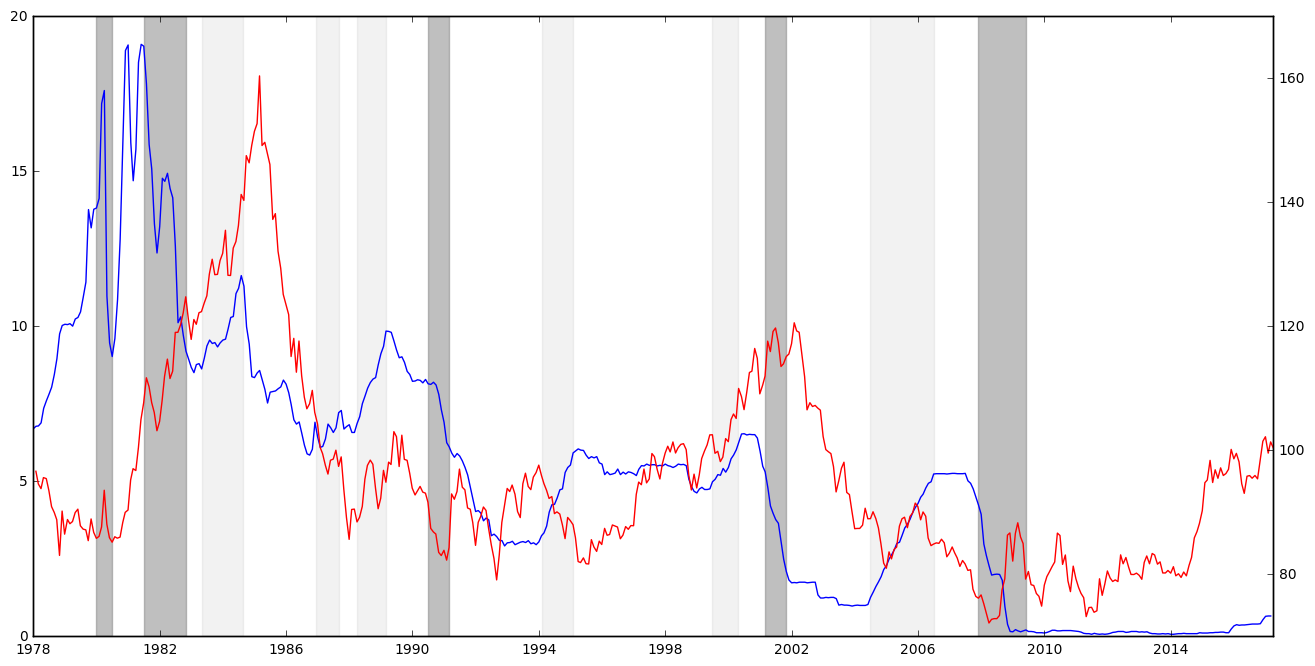

In [48]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
ax1.plot(df_plot.DATE, df_plot.FEDFUNDS)
for i in xrange(6):
    ax1.axvspan(df_cycle.iloc[i, 0], df_cycle.iloc[i, 1], alpha=0.1, color='grey')
    if i < 5:
        ax1.axvspan(rec.iloc[i, 0], rec.iloc[i, 1], alpha=0.5, color='grey')
ax2 = ax1.twinx()
#ax2.plot(sp500.index, sp500['Adjusted Close'], 'r')
#ax2.plot(dji.index, dji['Adjusted Close'], 'r')    
#ax2.plot(vix.index, vix['Adjusted Close'], 'r')
ax2.plot(dx.index, dx['Close'], 'r')
#ax2.plot(gdp_plot.DATE, gdp_plot.GDP, 'r')    
#py.iplot_mpl(fig, filename='fed_rates_hike')